# Step-1: Evaluate the linear regression and KNN regression algorithm 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import seaborn as sns # analysis / visualization
from sklearn.model_selection import train_test_split as tts  # data spliting

import warnings as w
w.filterwarnings('ignore')

# Import Dataset

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Height,Weight
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405
8554,Female,60.921791,131.253738


In [5]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
catg = df.select_dtypes('object')
cont = df.select_dtypes('number')

In [7]:
catg.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [8]:
cont.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [9]:
df.shape

(8555, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [11]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [12]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


# Seperate x,y

In [13]:
x = df.drop('Weight', axis=1)

In [14]:
x

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
8550,Female,60.483946
8551,Female,63.423372
8552,Female,65.584057
8553,Female,67.429971


In [15]:
y = df['Weight']

# One Hot Encoding

In [16]:
dummy = pd.get_dummies(x['Gender'],drop_first=True)

In [17]:
dummy

,Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [18]:
x = x.drop('Gender', axis=1)

In [19]:
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
8550,60.483946
8551,63.423372
8552,65.584057
8553,67.429971


In [20]:
x = pd.concat([x, dummy], axis=1)

In [21]:
x

,Height,Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
...,...,...
8550,60.483946,0
8551,63.423372,0
8552,65.584057,0
8553,67.429971,0


# Split the dataset into the traing set and test set

In [22]:
#train 70% ; test =30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=1)

In [23]:
xtrain.head()

,Height,Male
1277,72.385301,1
5361,60.960147,0
5728,69.119292,0
4276,68.271050,1
3112,64.991405,1


In [24]:
xtrain.shape

(5988, 2)

In [25]:
xtest.shape

(2567, 2)

In [26]:
ytrain

1277    189.165592
5361    124.876796
5728    168.864403
4276    172.941248
3112    144.551044
           ...    
2895    205.545795
7813    152.749747
905     175.093255
5192    156.832191
235     198.460249
Name: Weight, Length: 5988, dtype: float64

In [27]:
ytest

7154    160.800726
3258    184.516688
2188    184.262796
5609    166.844114
3186    200.466282
           ...    
8004    110.815421
7644    148.605255
8521    153.436481
957     170.310122
233     195.392618
Name: Weight, Length: 2567, dtype: float64

# Linear Regression

# Train the model on the training set

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

# Predict the test set results

In [31]:
ypred = reg.predict(xtest)
ypred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

# Evaluate the model

In [32]:
reg.score(xtest,ytest)  #Accuracy

0.9059959607091161

In [33]:
m = reg.coef_
m

array([ 5.96887438, 19.34359322])

In [34]:
c = reg.intercept_
c

-244.55280903255814

In [35]:
#5.97547256*68.271050+19.5062689*1-244.98864716917674 #(y=m1x1+m2x2+c)

In [36]:
#import library
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
mse = mean_squared_error(ytest, ypred)
mse

99.67250998070027

In [38]:
mae = mean_absolute_error(ytest, ypred)
mae

7.982132592729127

# Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

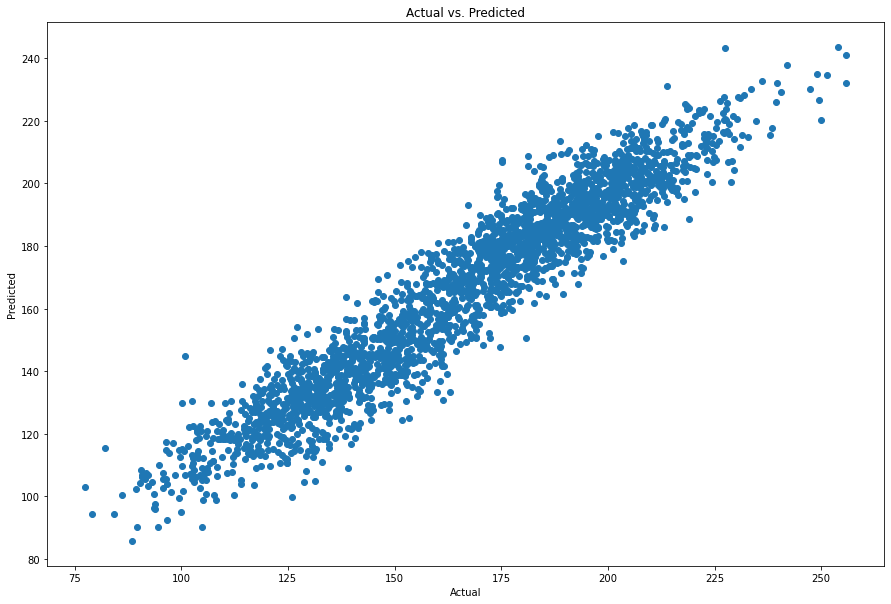

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
#plt.plot(xtrain.squeeze() , reg.predict(xtrain), color='red')

# Predicted Values

In [40]:
pred_y_df = pd.DataFrame({'Actual value':ytest, 'Predicted value':ypred, 'Difference': ytest-ypred})

In [41]:
pred_y_df 

,Actual value,Predicted value,Difference
7154,160.800726,143.830134,16.970591
3258,184.516688,197.534180,-13.017492
2188,184.262796,184.635151,-0.372355
5609,166.844114,149.318948,17.525167
3186,200.466282,197.992697,2.473584
...,...,...,...
8004,110.815421,107.393070,3.422351
7644,148.605255,153.054979,-4.449724
8521,153.436481,160.707852,-7.271372
957,170.310122,186.828527,-16.518405


In [42]:
pred_y_df [0:30]

,Actual value,Predicted value,Difference
7154,160.800726,143.830134,16.970591
3258,184.516688,197.534180,-13.017492
2188,184.262796,184.635151,-0.372355
5609,166.844114,149.318948,17.525167
3186,200.466282,197.992697,2.473584
6587,128.204119,136.189139,-7.985020
4002,185.538020,184.452279,1.085741
1206,158.374087,160.304003,-1.929916
5198,124.882434,122.688290,2.194144
8235,113.266334,116.697920,-3.431586


# KNN Regression (K-Nearest Neighbors Algorithm)

# Train the model on the training set 

In [43]:
#Import Library
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors = 500)

In [45]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=500)

# Predict the test set results

In [46]:
ypred1 = knn.predict(xtest)
ypred1

array([143.82388502, 196.67420877, 184.73402547, ..., 169.60561028,
       186.7091489 , 200.72229652])

# Evaluate the model

In [47]:
knn.score(xtest,ytest)  #Accuracy

0.8834589893323859

In [48]:
MSE = mean_squared_error(ytest, ypred1)

In [49]:
MSE

123.56846723346203

# Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

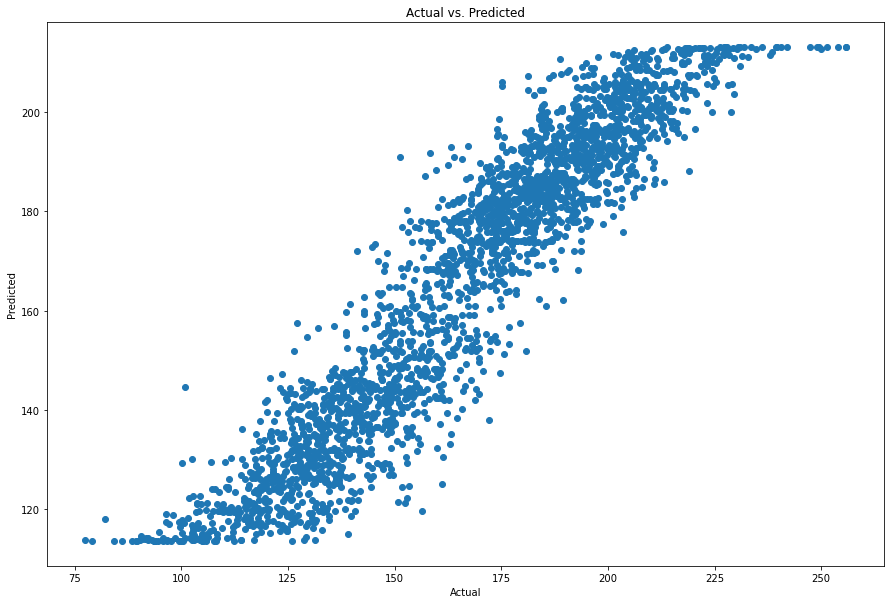

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, ypred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Predicted Values 

In [51]:
pred1_y_df = pd.DataFrame({'Actual value':ytest, 'Predicted value':ypred1, 'Difference': ytest-ypred1})

In [52]:
pred1_y_df

,Actual value,Predicted value,Difference
7154,160.800726,143.823885,16.976841
3258,184.516688,196.674209,-12.157521
2188,184.262796,184.734025,-0.471229
5609,166.844114,149.289300,17.554814
3186,200.466282,197.196231,3.270050
...,...,...,...
8004,110.815421,114.312661,-3.497240
7644,148.605255,156.032085,-7.426830
8521,153.436481,169.605610,-16.169129
957,170.310122,186.709149,-16.399027


# KNN Regressor Algorithm (for default value)

In [53]:
knn_1 = KNeighborsRegressor(n_neighbors = 5) 

In [54]:
knn_1.fit(xtrain,ytrain)

KNeighborsRegressor()

In [55]:
ypred_1 = knn_1.predict(xtest)
ypred_1

array([150.1761117 , 197.46276978, 179.03501546, ..., 160.26227546,
       180.65461322, 200.56451578])

In [56]:
knn_1.score(xtest,ytest)

0.8838502073708883

In [57]:
MSE = mean_squared_error(ytest, ypred_1)
MSE

123.15365863436983

In [58]:
pred2_y_df = pd.DataFrame({'Actual value':ytest, 'Predicted value':ypred_1, 'Difference': ytest-ypred_1})

In [59]:
pred2_y_df

,Actual value,Predicted value,Difference
7154,160.800726,150.176112,10.624614
3258,184.516688,197.462770,-12.946082
2188,184.262796,179.035015,5.227781
5609,166.844114,148.316105,18.528009
3186,200.466282,200.284997,0.181285
...,...,...,...
8004,110.815421,106.178594,4.636827
7644,148.605255,151.638938,-3.033684
8521,153.436481,160.262275,-6.825795
957,170.310122,180.654613,-10.344491


In [60]:
# From the accuray result between two algorithms , we see that the Linear Regression Algorithm is more accurate than KNN Regressor Algorithm.

# Step-2: Evaluate the decision tree classifier and KNN Classifier Algorithm 

# Import Library

In [61]:
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
from sklearn.model_selection import train_test_split  # data spliting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

import warnings as w
w.filterwarnings('ignore')

# Import Dataset

In [62]:
Data = pd.read_csv('Breast-Cancer.csv')

In [63]:
Data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [64]:
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
Data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [66]:
Data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [67]:
catg = Data.select_dtypes('object')
cont = Data.select_dtypes('number')

In [68]:
catg

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [69]:
cont

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [70]:
Data.shape

(569, 32)

In [71]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [72]:
Data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Seperate x,y

In [73]:
x = Data.drop('diagnosis', axis=1)

In [74]:
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
y = Data['diagnosis']

In [76]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Split the dataset into train and test

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [78]:
x_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,884689,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,...,12.65,21.19,80.88,491.8,0.1389,0.15820,0.180400,0.09608,0.2664,0.07809
58,857810,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
476,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.251200,0.13390,0.2534,0.07858
529,918465,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,...,13.45,15.77,86.92,549.9,0.1521,0.16320,0.162200,0.07393,0.2781,0.08052
422,906616,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,...,12.64,19.67,81.93,475.7,0.1415,0.21700,0.230200,0.11050,0.2787,0.07427


In [79]:
x_train.shape

(398, 31)

In [80]:
x_test.shape

(171, 31)

In [81]:
y_train

249    B
58     B
476    B
529    B
422    B
      ..
129    M
144    B
72     M
235    B
37     B
Name: diagnosis, Length: 398, dtype: object

In [82]:
y_test

421    B
47     M
292    B
186    M
414    M
      ..
6      M
487    M
11     M
268    B
419    B
Name: diagnosis, Length: 171, dtype: object

# Decision Tree Classification

# Train the model on the training set

In [83]:
clf = DecisionTreeClassifier() # creating object for decision tree

In [84]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

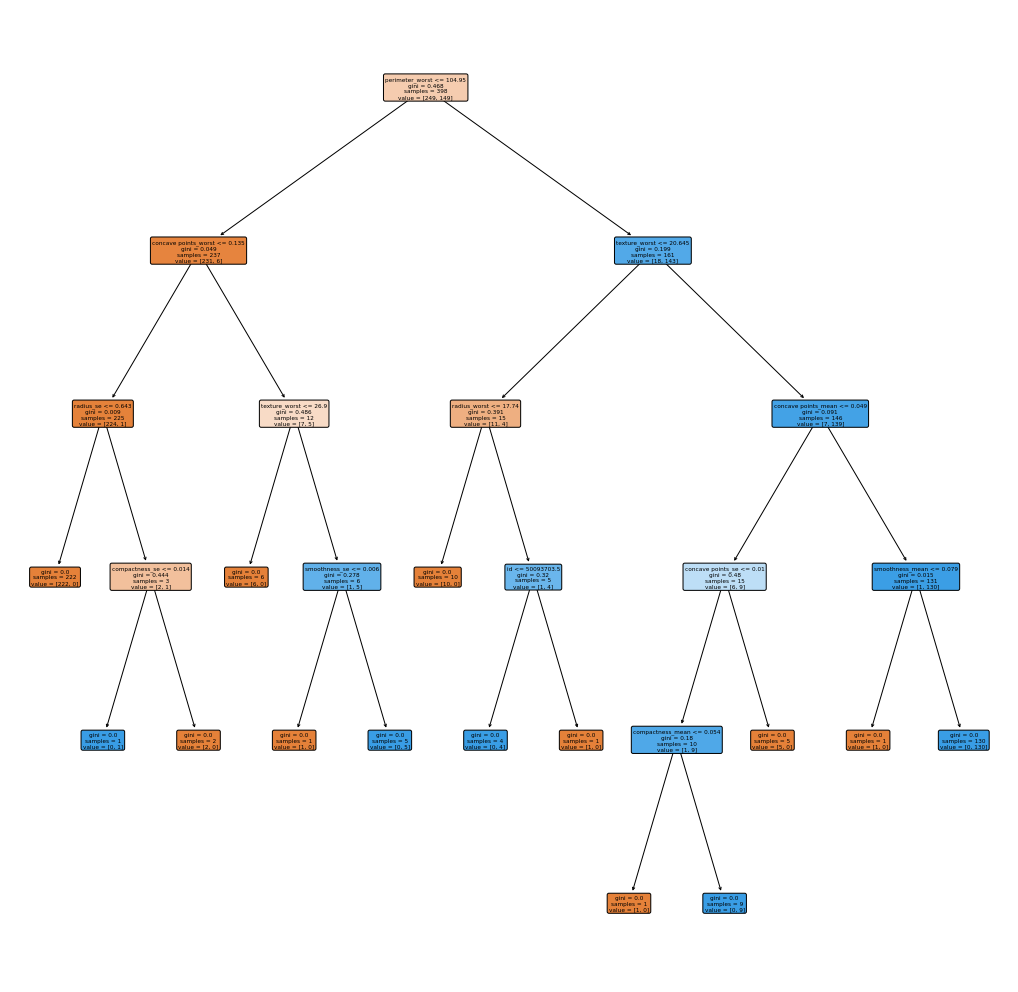

In [85]:
from sklearn import tree
plt.figure(figsize=(18,18))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)
plt.savefig('tree.png', dpi=1000)

In [86]:
y_pred = clf.predict(x_test)

In [87]:
y_pred # predicted result

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [88]:
np.array(y_test) # actual result

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

# Confusion Matrix

In [89]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           B       0.93      0.97      0.95       108\n           M       0.95      0.87      0.91        63\n\n    accuracy                           0.94       171\n   macro avg       0.94      0.92      0.93       171\nweighted avg       0.94      0.94      0.94       171\n'

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       108
           M       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [91]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   3],
       [  8,  55]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

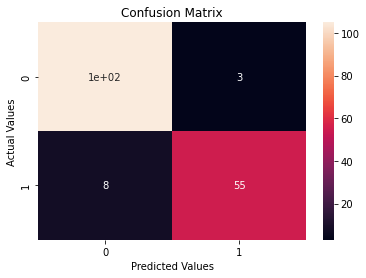

In [92]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [93]:
True_Positive, False_Negative, False_Positive, True_Negative = confusion_matrix(y_test, y_pred).reshape(-1)

In [94]:
(True_Positive, False_Negative, False_Positive, True_Negative)

(105, 3, 8, 55)

# Evaluate the model

In [95]:
accuracy_score(y_test, y_pred)

0.935672514619883

In [96]:
clf.score(x_test, y_test)

0.935672514619883

# AUC_ROC Curve

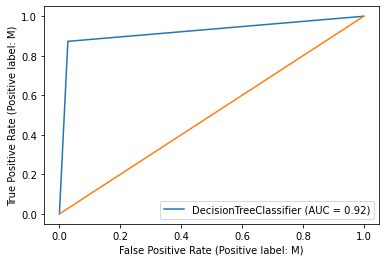

In [97]:
plot_roc_curve(clf, x_test, y_test)
plt.plot([0,1],[0,1])

# KNN Classification 

In [98]:
KNN = KNeighborsClassifier(n_neighbors = 50)

In [99]:
KNN

KNeighborsClassifier(n_neighbors=50)

In [100]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

# Predict the test set results

In [101]:
y_pred1 = KNN.predict(x_test)

In [102]:
y_pred1

array(['B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [103]:
classification_report(y_test, y_pred1)

'              precision    recall  f1-score   support\n\n           B       0.67      0.92      0.77       108\n           M       0.61      0.22      0.33        63\n\n    accuracy                           0.66       171\n   macro avg       0.64      0.57      0.55       171\nweighted avg       0.65      0.66      0.61       171\n'

In [104]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           B       0.67      0.92      0.77       108
           M       0.61      0.22      0.33        63

    accuracy                           0.66       171
   macro avg       0.64      0.57      0.55       171
weighted avg       0.65      0.66      0.61       171



In [105]:
CM = confusion_matrix(y_test, y_pred1)
CM

array([[99,  9],
       [49, 14]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

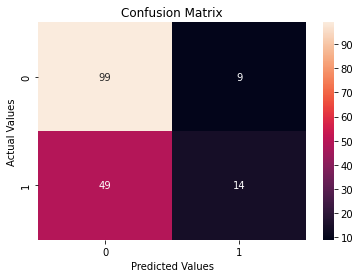

In [106]:
sns.heatmap(CM, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [107]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred1).reshape(-1)

In [108]:
(tp, fn, fp, tn)

(99, 9, 49, 14)

# Evaluate the model

In [109]:
accuracy_score(y_test, y_pred1)

0.6608187134502924

In [110]:
KNN.score(x_test, y_test)

0.6608187134502924

# AUC_ROC Curve

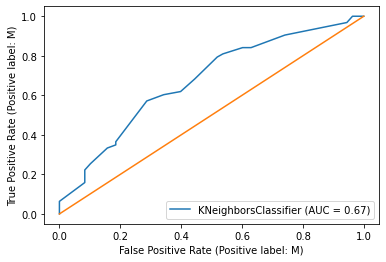

In [111]:
plot_roc_curve(KNN, x_test, y_test)
plt.plot([0,1],[0,1])

In [112]:
#From the AUC_ROC curve between two algorithms , we understand that the Decision Tree Classifier Algorithm is more accurate than KNN Classifier Algorithm.